# Inferential Statistics
Inferential Statistics makes inferences and predictions about extensive data by considering a sample data from the original data. It uses probability to reach conclusions. The process of “inferring” insights from a sample data is called <b>“Inferential Statistics.”</b>

To understand <b>Inferential Statistics</b>, we have to have basic knowledge about the following fundamental topics in <b>Probability</b> -  
1. The Basic Definition of Probability
2. The multiplication rule of Probability
3. The addition rule of Probability
4. nCr (Combination)

We can practice the basics here,  
<a href="https://www.mathsisfun.com/data/probability.html">Math is Fun</a>  
<a href="https://www.mathopolis.com/questions/q.php?id=700&site=1&ref=/data/probability.html&qs=700_701_702_1475_1476_1477_2175_2176_2177_2178">Mathopolis</a>

### Random Variable:
Let’s take a real-world example of Slot-Machines in Casinos.   
How do Casinos make sure they don’t lose money in the long run, on their slot-machines?  
It’s pretty simple; they use Probability.

### Setting up a game:
To understand this, let’s play a game,  
Take a bag which contains <b>3 Red balls</b> and <b>2 Blue balls</b>.  

The game is, we have to pick one ball from the bag, note it’s color and place the ball inside the bag and pick a ball again from the bag, note the color, and put it inside.   Repeat this process total of 4 times. This whole process is one set.
Conduct this experiment K times, i.e., K games or K players playing  the game

For this excercise we pick K = 10000

The Condition is, if we draw Red ball four times consecutively, i.e., the set contains all the Red Balls, then we would receive Rs. 2000. If not, we’ll have to pay Rs. 100 to the dealer.

In [1]:
import numpy as np
import pandas as pd

import collections

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
num_players = 10000
game_results = []
for i in range(num_players):
    ball1 = np.random.randint(2)
    ball2 = np.random.randint(2)
    ball3 = np.random.randint(2)
    ball4 = np.random.randint(2)
    draw = [ball1, ball2, ball3, ball4]
    game_results.append(draw)

In [3]:
game_results = np.asarray(game_results)

In [4]:
game_results.shape

(10000, 4)

In [5]:
X = dict(sorted(collections.Counter(
    game_results.sum(axis = 1)
).items()))

### Playing the game:
Let’s see if we play this game, the dealer wins or loses money in the long run.  
  
To understand all this, we’ll approach the problem in 3 steps.  
1. Find all the Possible outcomes.
2. Find the Probability of each outcome.
3. Using the Probabilities, estimate the profit/loss.

#### 1. Possible Outcomes
Let’s see, all the possible outcomes we can get if we draw a ball from the bag four times are.  
1. RRRR
2. BRRR, RBRR, RRBR, RRRB
3. BBRR, BRBR, BRRB, RBBR, RBRB, RRBB
4. BBBR, BBRB, BRBB, RBBB
5. BBBB  

There are a total of 16 outcomes possible.

#### 2. Probability of each outcome

It is advisable to quantify the outcome, to calculate the probability.  
By using “Random Variable,” we’ll quantify the result.

##### Random Variable:
“X” denotes <b>Random Variable.</b>  
The definition of “X” depends on our problem statement.  
Here, we are interested in the number of red balls drawn from the bag.  

<b>X = Number of Red Balls drawn.</b>  
Now the possible outcomes in terms of ‘X’ is -  
RRRR — — — X = 4  
BRRR, RBRR, RRBR, RRRB — — — X = 3  
BBRR, BRBR, BRRB, RBBR, RBRB, RRBB — — — X = 2  
BBBR, BBRB, BRBB, RBBB — — — X = 1  
BBBB — — — X = 0  

So, based on X value, we can say that, if X=4, the player wins the game, and for remaining all the values of X, the player loses the game.  

After conducting the experiment 1000 times, and storing the values, let’s plot the outcomes in a histogram, we’ll get the graph something like this,

In [6]:
X

{0: 632, 1: 2489, 2: 3802, 3: 2490, 4: 587}

In [7]:
games_df=pd.DataFrame.from_dict(X, orient='index').reset_index().rename(columns={'index':'X', 0:'Games'})

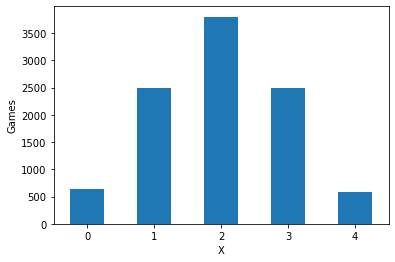

In [8]:
games_df['Games'].plot.bar()
plt.xticks(rotation=360)
plt.xlabel("X")
plt.ylabel("Games")
plt.show()

The definition of Probability is  
Probability(P) = (Favorable Outcomes)/(Total Number of Outcomes)  
Now, let’s find out the Probability for different values of X based on the above graph.

In [9]:
games_df["Prob"] = games_df["Games"].apply(lambda x: round(x/games_df["Games"].sum(),3))

In [10]:
games_df

,X,Games,Prob
0,0,632,0.063
1,1,2489,0.249
2,2,3802,0.380
3,3,2490,0.249
4,4,587,0.059


#### 3. Using the Probabilities, estimate the profit/loss  
Since we now know the probabilities for X=0 to 4,   
let’s calculate the total number of red balls drawn by a player in one game.  

Number of players with 0 red balls = P(X=0) x num_players  
Number of players with 1 red balls = P(X=1) x num_players  
Number of players with 2 red balls = P(X=2) x num_players  
Number of players with 3 red balls = P(X=3) x num_players  
Number of players with 4 red balls = P(X=4) x num_players  

In [11]:
games_df["NumPlayers"] = games_df["Prob"] * num_players

In [12]:
games_df

,X,Games,Prob,NumPlayers
0,0,632,0.063,630.0
1,1,2489,0.249,2490.0
2,2,3802,0.380,3800.0
3,3,2490,0.249,2490.0
4,4,587,0.059,590.0


<b>Total number of red balls drawn = 0 x Number of players with 0 red balls + 1 x Number of players with 1 red balls +  2 x Number of players with 2 red balls + 3 x Number of players with 3 red balls + 4 x Number of players with 4 red balls</b>

In [13]:
((games_df["X"] * games_df["NumPlayers"]).sum()) 

19920.0

So, we saw the approx total number of  Red Balls drawn by all the players in the game.

Average number of red balls = Total number of red balls drawn / num_players  

This is the average number of <b>expected</b> "Red" balls in a game.  

In [14]:
((games_df["X"] * games_df["NumPlayers"]).sum()) / num_players

1.992

If we remember, in our game, players will get Rs 2000 if X=4, and for remaining all X values, players have to pay Rs 1000.  

Now, the probability of a player getting Rs 2000 is equal to the player’s probability of drawing four red balls.  
That means, for remaining all cases, players have to pay Rs 100.  

So, X can take values +2000 and -100  
<b>P(X = +2000) = P(4 red balls)  
P(X = -100) = P(0,1,2, or 3 red balls)</b>   

Now, the Expected Value of X(where X is the money won by after playing the game once)  
<b>EV(X) = 1000 x P(4 red balls) + (-50) x P(0,1,2 or 3 red balls)</b>

In [15]:
(2000*games_df.loc[games_df["X"]==4, "Prob"]) -100*games_df.loc[games_df["X"]!=4, "Prob"].sum()

4    23.9
Name: Prob, dtype: float64

This means that the player on average can expect to <b>win</b> from this game in the long run <b>(as the expected value is positive)</b>, which is very good for the player, <b>but this model will not work for the game organizers</b> as they are losing the money.

If the <b>organisers wants to make money</b>, they need to ensure the <b>player’s Expected Value should be in Negative</b>.   
For, this the organizers have to change the prize money, like Rs. 1500 for the win and Rs. 150 if the player loses.

In [16]:
(1500*games_df.loc[games_df["X"]==4, "Prob"]) -150*games_df.loc[games_df["X"]!=4, "Prob"].sum()

4   -52.65
Name: Prob, dtype: float64

#### Probability Density Function

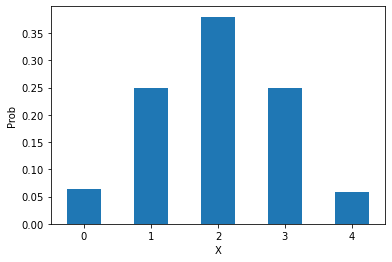

In [18]:
games_df['Prob'].plot.bar()
plt.xticks(rotation=360)
plt.xlabel("X")
plt.ylabel("Prob")
plt.show()

<b>Cumulative Density Function</b>  
The cumulative density function (CDF) of a random variable X is the sum or accrual of probabilities up to some value. It shows how the sum of the probabilities approaches 1, which sometimes occurs at a constant rate and sometimes occurs at a changing rate.

For a <b>discrete random variable</b>, the CDF is equivalent to 



where f(X) is the probability density function.

For a <b>discrete random variable</b>, the CDF is equivalent to  
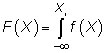  
where f(X) is the probability density function.